<a href="https://colab.research.google.com/github/darya-nrgs/notebooks-my_colab_files/blob/main/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

a good youtube link for PCA

In [ ]:
from IPython.display import HTML

HTML('<div align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/FgakZw6K1QQ" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></div>')

1. import librarys

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

create two-dimensional dataset. PCA will find the "best" line according to two different criteria of what is the "best". First, the variation of values along this line should be maximal.

2. create random points to apply pca on it.

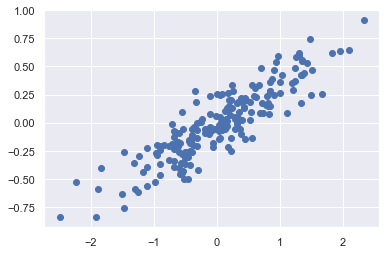

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])

In principal component analysis, relationship between the x and y values is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset.

3. fit pca model to our created dataset.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

4. Direction and value of eigenvalue and eigenvectors.

In [ ]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


5. Draw PCA vectors

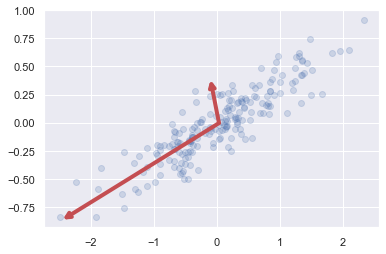

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=4,
                    shrinkA=0, shrinkB=0, color='r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

6. using PCA as a dimensionality reduction transform:

In [ ]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


7. Transform data back to its original space. In other words, return an input X_original whose transform would be X.


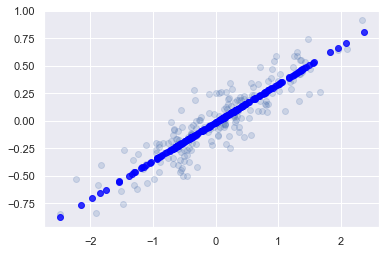

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='blue')

Pay attention to how the "spread" (we call it "variance") of the red dots changes while the line rotates; can you see when it reaches maximum? if we reconstruct the original two characteristics (position of a blue dot) from the new one (position of a red dot), the reconstruction error will be given by the length of the connecting red line. Observe how the length of these red lines changes while the line rotates.

If you stare at this animation for some time, you will notice that "the maximum variance" and "the minimum error" are reached at the same time, namely when the line points to the magenta ticks I marked on both sides of the wine cloud. This line corresponds to the new wine property that will be constructed by PCA.

In [ ]:
from IPython.display import Image
Image(url='https://i.stack.imgur.com/Q7HIP.gif')

Apply PCA on hand-written digits

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

 Data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

C:\Users\narge\AppData\Local\Temp\ipykernel_12772\1846767581.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


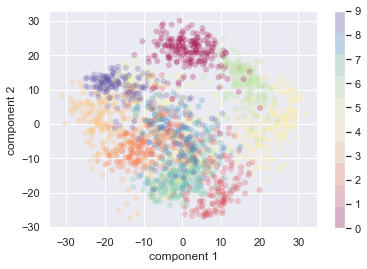

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.25,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

for more examples of Principal Component Analysis:
[jakevdp](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

# Eigenfaces

In [ ]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

In [ ]:
dataset_path = 'Dataset/'
dataset_dir  = os.listdir(dataset_path)
width  = 195
height = 231

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Dataset/'

Train Images:


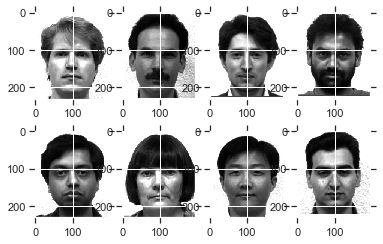

In [ ]:
print('Train Images:')
train_image_names = ['subject01.normal.jpg', 'subject02.normal.jpg', 'subject03.normal.jpg', 'subject07.normal.jpg', 'subject10.normal.jpg', 'subject11.normal.jpg', 'subject14.normal.jpg', 'subject15.normal.jpg']
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
    img = plt.imread(dataset_path + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

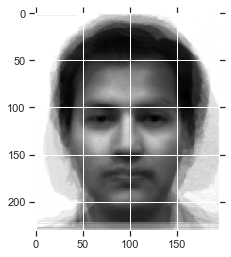

In [ ]:
# Mean face
mean_face = np.zeros((1,height*width))

for face in training_tensor:
    mean_face = np.add(mean_face,face)

mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
# Normalised faces
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

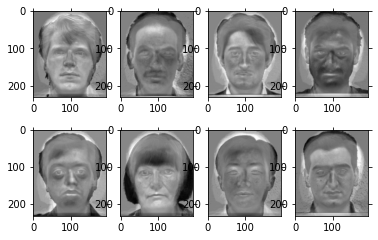

In [ ]:
# Display normalised faces
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
# Covariance matrix
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,8.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 240.21425354  -54.37445049  -49.91300972 -167.04449305    6.71011608
    95.13549119   51.86167951 -122.58958706]
 [ -54.37445049  271.21637481  -39.69264581   66.46457924  -62.78262301
  -159.33970561  -96.7188796    75.22735047]
 [ -49.91300972  -39.69264581  223.857185     46.24225037  -32.6657127
  -134.1771553   -35.12864547   21.47773363]
 [-167.04449305   66.46457924   46.24225037  345.77440281  -80.00529939
  -267.06328206  -73.29909108  128.93093316]
 [   6.71011608  -62.78262301  -32.6657127   -80.00529939  256.35235515
   -63.58037876   53.02911913  -77.05757652]
 [  95.13549119 -159.33970561 -134.1771553  -267.06328206  -63.58037876
   747.14220277    1.26270451 -219.37987674]
 [  51.86167951  -96.7188796   -35.12864547  -73.29909108   53.02911913
     1.26270451  238.6557604  -139.66264741]
 [-122.58958706   75.22735047   21.47773363  128.93093316  -77.05757652
  -219.37987674 -139.66264741  333.05367046]]


In [ ]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.24216786  0.23304127  0.35355339 -0.54650028  0.34900164  0.24263134
  -0.46008264 -0.26652539]
 [ 0.2320557  -0.21004915  0.35355339  0.28336041  0.66156373 -0.40750816
   0.14797794 -0.26666354]
 [ 0.15104702  0.0756895   0.35355339  0.19555006 -0.49779746 -0.46987952
  -0.57605919 -0.08822017]
 [ 0.41563654 -0.18098142  0.35355339 -0.49133856 -0.36828479  0.0496277
   0.45683638 -0.28510056]
 [-0.05114387  0.48868195  0.35355339 -0.17720876  0.0789403  -0.29622126
   0.28068609  0.65529232]
 [-0.73015769 -0.53226997  0.35355339  0.03110374 -0.15710617 -0.06932017
   0.14579398  0.08274941]
 [-0.14350419  0.47101419  0.35355339  0.52641965 -0.14266291  0.41459652
   0.25325285 -0.31472933]
 [ 0.36823436 -0.34512637  0.35355339  0.17861375  0.07634566  0.53607356
  -0.2484054   0.48319727]]

Eigenvalues of Cov(X): 
[1.11554951e+03 4.85892625e+02 1.26975628e-14 1.22955135e+02
 2.95284929e+02 1.76427142e+02 2.32097712e+02 2.28059153e+02]


In [ ]:
normalised_training_tensor.shape

(8, 45045)

In [ ]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]
eigvectors_sort

[array([-0.24216786,  0.2320557 ,  0.15104702,  0.41563654, -0.05114387,
        -0.73015769, -0.14350419,  0.36823436]),
 array([ 0.23304127, -0.21004915,  0.0756895 , -0.18098142,  0.48868195,
        -0.53226997,  0.47101419, -0.34512637]),
 array([ 0.34900164,  0.66156373, -0.49779746, -0.36828479,  0.0789403 ,
        -0.15710617, -0.14266291,  0.07634566]),
 array([-0.46008264,  0.14797794, -0.57605919,  0.45683638,  0.28068609,
         0.14579398,  0.25325285, -0.2484054 ]),
 array([-0.26652539, -0.26666354, -0.08822017, -0.28510056,  0.65529232,
         0.08274941, -0.31472933,  0.48319727]),
 array([ 0.24263134, -0.40750816, -0.46987952,  0.0496277 , -0.29622126,
        -0.06932017,  0.41459652,  0.53607356]),
 array([-0.54650028,  0.28336041,  0.19555006, -0.49133856, -0.17720876,
         0.03110374,  0.52641965,  0.17861375]),
 array([0.35355339, 0.35355339, 0.35355339, 0.35355339, 0.35355339,
        0.35355339, 0.35355339, 0.35355339])]

Cumulative proportion of variance explained vector: 
[0.41996902 0.60289218 0.7140576  0.80143503 0.88729207 0.95371129
 1.         1.        ]


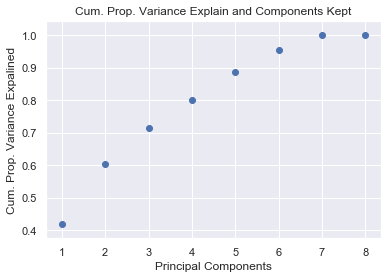

In [ ]:
# Find cumulative variance of each principle component
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [ ]:
# Choose the necessary no.of principle components:
reduced_data = np.array(eigvectors_sort[:5]).transpose()

In [ ]:
# Now we try to find the projected data. This will form the eigen space.
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

In [ ]:
print(training_tensor.transpose().shape)
print(reduced_data.shape)

(45045, 8)
(8, 5)


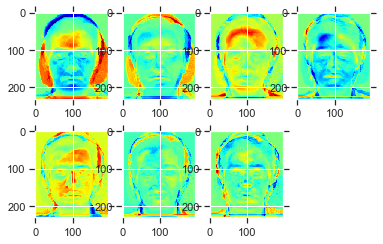

In [ ]:
# Plot eigen faces
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='jet')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
# Finding weights for each traning image
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w

array([[-8.48287612e+07,  5.81765456e+07,  4.32101930e+07,
        -7.76647463e+07, -3.06341089e+07,  3.58272786e+07,
        -3.53176153e+07],
       [ 8.90553605e+07, -4.26457404e+07,  6.83431225e+07,
         2.56112699e+07, -1.89660204e+07, -3.27984752e+07,
         1.63052275e+07],
       [ 6.49888673e+07,  1.91766896e+07, -5.08976401e+07,
        -6.15416348e+07, -1.02271740e+07, -2.29160969e+07,
         4.87793668e+06],
       [ 1.63772788e+08, -3.62801041e+07, -4.07933003e+07,
         4.85649446e+07, -2.11225024e+07, -2.23707416e+06,
        -1.88350738e+07],
       [-2.50823074e+07,  7.92886248e+07,  6.20549912e+06,
         3.76311039e+07,  5.70068630e+07, -2.62025963e+07,
        -3.84041861e+06],
       [-3.03507468e+08, -1.07059520e+08, -2.15641534e+07,
         4.34624113e+07,  1.37673278e+07, -2.06872576e+07,
         1.02386688e+07],
       [-5.73401449e+07,  8.29527225e+07, -1.50118335e+07,
         2.00947251e+07, -2.61070419e+07,  2.69240539e+07,
         2.3016248

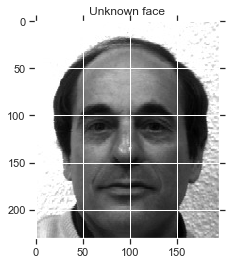

In [ ]:
# Now we recognise unknown face!
unknown_face        = plt.imread(dataset_path + 'subject12.normal.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

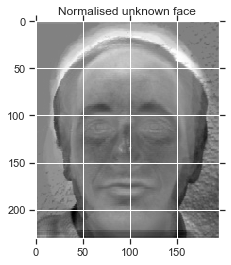

In [ ]:
# Normalise unknown face
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [ ]:
# Wieghts of uknown face
# Projecting the normalized vector onto the eigenspace, to find out the weights:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([ 4.70038929e+07,  1.65543498e+08,  2.16510446e+07, -1.60182424e+08,
       -3.66812704e+07,  9.24751216e+07, -3.78133854e+07])

# Finding the $min|W - W_{unknown}|$

In [ ]:

diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)
min(norms)

[1.98578071e+08 3.17406144e+08 2.29297886e+08 3.33789084e+08
 2.75719259e+08 5.08103510e+08 2.44257922e+08 2.90397405e+08]


198578071.00074333

### Reconizing all test images

In [ ]:
count        = 0
num_images   = 0
correct_pred = 0
def recogniser(img, train_image_names,proj_data,w):
    global count,highest_min,num_images,correct_pred
    unknown_face        = plt.imread(dataset_path+img)
    num_images          += 1
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)

    t1 = 100111536
    #t1 = 200535910.268 # working with 6 faces
    #t0 = 86528212
    t0 = 88831687
    #t0 = 143559033 # working with 6 faces

    if norms[index] < t1:
        plt.subplot(9,4,1+count)
        if norms[index] < t0: # It's a face
            if img.split('.')[0] == train_image_names[index].split('.')[0]:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
                plt.imshow(imread(dataset_path+train_image_names[index]), cmap='gray')

                correct_pred += 1
            else:
                plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
                plt.imshow(imread(dataset_path+train_image_names[index]), cmap='gray')
        else:
            if img.split('.')[0] not in [i.split('.')[0] for i in train_image_names] and img.split('.')[0] != 'apple':
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:
        plt.subplot(9,4,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a face!', color='r')
        else:
            plt.title('Not a face!', color='g')
            correct_pred += 1
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1


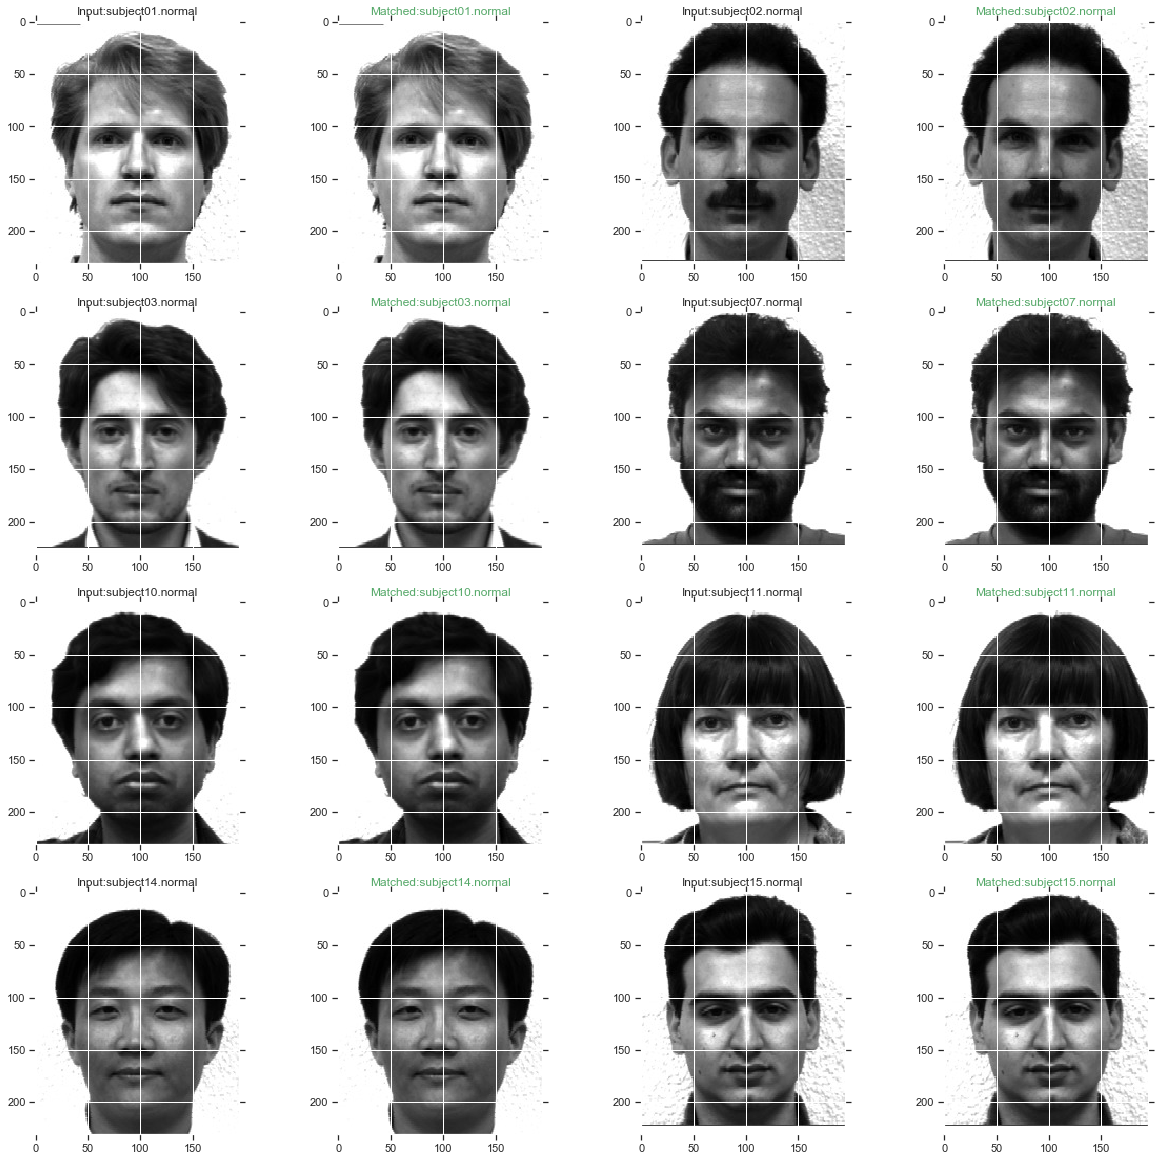

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(len(train_image_names)):
    recogniser(train_image_names[i], train_image_names,proj_data,w)

plt.show()

# t-SNE

a good youtube link for t-SNE

In [ ]:
from IPython.display import HTML

HTML('<div align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/NEaUSP4YerM" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></div>')

## Overview of working of t-SNE:


*   The algorithms starts by calculating the probability of similarity of points in high-dimensional space and calculating the probability of similarity of points in the corresponding low-dimensional space.
*   The similarity of points is calculated as the conditional probability that a point A would choose point B as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian (normal distribution) centered at A.
*   It then tries to minimize the difference between these conditional probabilities (or similarities) in higher-dimensional and lower-dimensional space for a perfect representation of data points in lower-dimensional space.








An example for better intuition. project 2D to 1D data points.

In [ ]:
from IPython.display import Image, display
display(Image(url='https://miro.medium.com/max/700/0*NYve_va3wHU4zNnj.png'))
Image(url='https://miro.medium.com/max/700/0*gx5m_CS7gVUn8WLH.gif')

**t-Distributed Stochastic Neighbor Embedding** (t-SNE) is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. Contrary to PCA it is not a mathematical technique but a probablistic one.

In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# Take the first 500 data points
X = digits.data[:500]
y = digits.target[:500]

In [ ]:
# Fit and transform with a TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [ ]:
# Project the data in 2D
X_2d = tsne.fit_transform(X)


C:\Users\narge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\narge\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


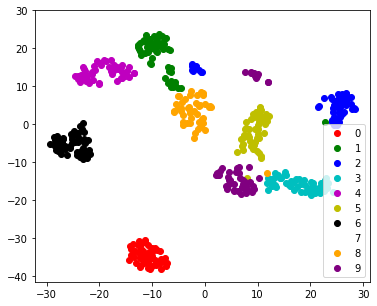

In [ ]:
# Visualize the data
target_ids = range(len(digits.target_names))

plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function.



*   t-SNE is computationally expensive.
*   PCA it is a mathematical technique, but t-SNE is a probabilistic one.
*   Sometimes in t-SNE different runs with the same hyperparameters may produce different results.
*   Since PCA is a linear algorithm, it will not be able to interpret the complex polynomial relationship between features while t-SNE is made to capture exactly that.


# References

[Lecture 9 – Data 100, Summer 2020 - by Suraj Rampure](http://ds100.org/su20/resources/assets/lectures/lec09/lec09.html)

[seaborn](https://seaborn.pydata.org/)

[matplotlib](https://matplotlib.org/stable/index.html)

[PCA - stackexchange](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

[PCA - Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)

[Correlation Heatmap - medium](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)

[towardsdatascience](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a)




